# About the project

This project will investigate whether movie production budget exhibits a positive relationship with box office revenue. To achieve this target, I will employ data of 6,000 movies extracted from the website: <a href="https://www.the-numbers.com/movie/budgets">the-numbers.com</a>, based on so-called `Biggest Budgets` table.

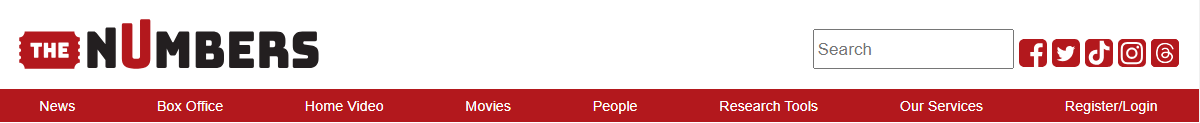

I choose this data source because it gives a large dataset with sufficiently comprehensive information for my analysis. Unfortunately, this dataset only contain information about revenue from the whole globe in general and the US in particular. I will do another project for Vietnamese movies in the future if sufficient data are available.

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

# Read the Data

In [3]:
df_movies = pd.read_csv("movies_data.csv")

# Data Exploration & Cleaning

In [4]:
print(f"The movies dataset has the shape of {df_movies.shape}.")

The movies dataset has the shape of (6000, 5).


In [5]:
df_movies.head()

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
0,12/9/2022,Avatar: The Way of Water,"$460,000,000","$684,075,767","$2,319,591,720"
1,4/23/2019,Avengers: Endgame,"$400,000,000","$858,373,000","$2,788,912,285"
2,5/20/2011,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
3,4/22/2015,Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
4,5/17/2023,Fast X,"$340,000,000","$145,960,660","$714,414,576"


### Handle missing values & duplicated values

In [6]:
print(f"Missing values: {df_movies.isna().values.any()}")
print(f"Duplicated values: {df_movies.duplicated().values.any()}")

Missing values: False
Duplicated values: False


In [7]:
print(f"Check if there is any missing value in a column:\n{df_movies.isna().any()}")

Check if there is any missing value in a column:
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Domestic_Gross       False
USD_Worldwide_Gross      False
dtype: bool


##### Comments

There is no missing values found out by using `isna()` function. However, if we check the entries with minimum length in `Release_Date` column, we will find out there are actually missing values of release date, which are recorded in the dataset as 'Unknown'.

In [8]:
df_movies[df_movies['Release_Date'].str.len() == df_movies['Release_Date'].str.len().min()]

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
278,Unknown,Desert Warrior,"$140,000,000",$0,$0
878,Unknown,b,"$70,000,000",$0,$0
1371,Unknown,Hannibal the Conqueror,"$50,000,000",$0,$0
1549,Unknown,Les Bronzés 3: amis pour la vie,"$42,000,000",$0,"$83,833,602"
1740,Unknown,Down Under Cover,"$40,000,000",$0,$0
...,...,...,...,...,...
5909,Unknown,Loving Annabelle,"$1,000,000",$0,"$5,382"
5928,Unknown,Bang Bang Baby,"$1,000,000",$0,$0
5966,Unknown,Snitch,"$850,000",$0,$0
5967,Unknown,Harrison Montgomery,"$850,000",$0,$0


##### Comments

We need to drop these 73 rows to facilitate later analysis and visualisation. Given that the dataset is pretty large with 6000 rows, such trivial removal will not affect our interpretation.

In [9]:
df_movies.drop(df_movies[df_movies.Release_Date == 'Unknown'].index, inplace=True)

In [10]:
print(f"The shape of resulting dataset is: {df_movies.shape}.")

The shape of resulting dataset is: (5927, 5).


### Data Types Conversion

In [11]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5927 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Release_Date           5927 non-null   object
 1   Movie_Title            5927 non-null   object
 2   USD_Production_Budget  5927 non-null   object
 3   USD_Domestic_Gross     5927 non-null   object
 4   USD_Worldwide_Gross    5927 non-null   object
dtypes: object(5)
memory usage: 277.8+ KB


Checking the data types of the entries in each column, we realise that there is a need to convert the Release_Date column to a DateTime type and also convert the data in the budget and revenue columns to numeric types.

#### Convert the `Release_Date` column to a Datetime type. 

In [12]:
df_movies.Release_Date = pd.to_datetime(df_movies.Release_Date)

#### Convert the budget and revenue columns to a numeric type. 

Convert the USD_Production_Budget, USD_Worldwide_Gross, and USD_Domestic_Gross columns to a numeric format by removing `$` signs and `,`.

In [13]:
char_to_remove = ["$", ","]
columns_to_clean = ['USD_Production_Budget', 'USD_Domestic_Gross', 'USD_Worldwide_Gross']
for column in columns_to_clean:
    for char in char_to_remove:
        df_movies[column] = df_movies[column].str.replace(char, "")
    df_movies[column] = df_movies[column].astype('float')

When we check `.info()` again to confirm that the columns now have the desired data types.

In [14]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5927 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Release_Date           5927 non-null   datetime64[ns]
 1   Movie_Title            5927 non-null   object        
 2   USD_Production_Budget  5927 non-null   float64       
 3   USD_Domestic_Gross     5927 non-null   float64       
 4   USD_Worldwide_Gross    5927 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 277.8+ KB


In [15]:
df_movies.describe()

,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
count,"5,927.00","5,927.00","5,927.00"
mean,"35,200,940.21","45,385,149.32","100,943,984.97"
std,"44,718,843.65","73,899,084.32","191,868,648.04"
min,"750,000.00",0.00,0.00
25%,"7,000,000.00","2,784,684.50","6,796,384.00"
50%,"20,000,000.00","19,700,032.00","33,118,854.00"
75%,"45,000,000.00","55,782,491.50","106,015,330.00"
max,"460,000,000.00","936,662,225.00","2,923,706,026.00"


### Comments

Now all the figures have been converted to numeric type, we can use `.describe()` to explore some descriptive statistics of the dataset. First, it is clearly seen that on average film companies do earn a lot of money by making films. The mean production budget is 35.5 million USD while the mean USA revenue is higher than mean budget by just over 10 million USD. Strikingly, the average global revenue reaches an impressive figure of over 100 million USD. 

However, quite a lot of films lose money too. In fact, the films in the bottom quartile apparently lose money, since their cost is up to 7 million USD and they only bring in less than 6.8 million USD in worldwide revenue!

On the other side, some movies recorded show no revenue, either in USA or even around the globe. It could be that these movies either never screened or cancelled, or they might be unreleased at the time the data recorded. We will now dig inside this aspect to get more thorough insights.

Another thing to mention is that the minimum production cost was 750,000 USD, which is pretty large, since this project employed the data extracted from `Biggest Budgets` table among all the datasets provided on <a href="https://www.the-numbers.com/movie/budgets">the-numbers.com</a>.

# Investigating the Zero Revenue Films


First, we check the films that grossed $0 worldwide, then we check the films that had positive revenue worldwide but made no revenue in the US. 

In [16]:
df_movies[df_movies.USD_Worldwide_Gross == 0].sort_values('USD_Production_Budget', ascending=False)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
53,2023-12-20,Aquaman and the Lost Kingdom,"205,000,000.00",0.00,0.00
99,2023-11-22,Wish,"200,000,000.00",0.00,0.00
253,2019-12-13,6 Underground,"150,000,000.00",0.00,0.00
348,2023-12-06,Wonka,"125,000,000.00",0.00,0.00
370,2018-11-09,Outlaw King,"120,000,000.00",0.00,0.00
...,...,...,...,...,...
5958,2014-12-02,40 Weeks,"900,000.00",0.00,0.00
5959,2015-05-05,Le bonheur d'Elza,"900,000.00",0.00,0.00
5968,2016-01-08,The Abandoned,"850,000.00",0.00,0.00
5986,2015-01-09,Vessel,"800,000.00",0.00,0.00


In [17]:
df_movies.loc[(df_movies.USD_Worldwide_Gross > 0) & (df_movies.USD_Domestic_Gross == 0)].sort_values('USD_Worldwide_Gross', ascending=False)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
373,2021-01-25,Tang Ren Jie Tan An 3,"117,000,000.00",0.00,"699,072,066.00"
3899,2016-08-10,Line Walker (使徒行者),"10,800,000.00",0.00,"89,569,657.00"
3891,2014-12-17,La famille Bélier,"11,000,000.00",0.00,"82,438,670.00"
3515,2017-08-16,Sha Po Lang: Tan Lang,"14,500,000.00",0.00,"79,226,860.00"
96,2020-09-04,Mulan,"200,000,000.00",0.00,"69,973,540.00"
...,...,...,...,...,...
5751,1941-10-28,How Green Was My Valley,"1,250,000.00",0.00,382.00
5805,1972-03-10,Silent Running,"1,100,000.00",0.00,331.00
5947,2014-11-21,Food Chains,"913,000.00",0.00,176.00
5555,2015-03-20,The Walking Deceased,"2,000,000.00",0.00,43.00


As can be seen, there are 236 movies that make no revenue worldwide. The movie with highest production cost with no global revenue is "Aquaman and The Lost Kingdom". The movie needs 205 million dollars to be completed. Another interesting thing to notice is that the release date of this movie is 20 December 2023 while the date of scraping the data from the website is 17 November 2023, which is even before the date the movie is going to be released. This explains why this movie has no reported revenue. Many other movies have release date many years before but still be recorded with zero revenue possibly because these movies are eventually cancelled or screened, or possibly there are some problems regarding collecting the data related to these movies.

On the other hand, the second output shows that 241 movies that do not generate revenue within the US but do earn money worldwide. Among these movies, the one that earns most worldwide is "Tang Ren Jie Tan An 3". This movie seems to achieve a huge success since the global box office revenue is approximately 6 times the production budget. 

In [18]:
df_movies.loc[(df_movies.USD_Worldwide_Gross > 0) & (df_movies.USD_Domestic_Gross == 0)].sort_values('USD_Production_Budget', ascending=False).head(5)

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
96,2020-09-04,Mulan,"200,000,000.00",0.00,"69,973,540.00"
98,2022-07-13,The Gray Man,"200,000,000.00",0.00,"451,178.00"
97,2021-07-02,The Tomorrow War,"200,000,000.00",0.00,"19,220,000.00"
155,2022-03-10,Turning Red,"175,000,000.00",0.00,"10,872,141.00"
194,2019-11-01,The Irishman,"159,000,000.00",0.00,"914,706.00"


We continue to examine movies with zero revenue in the US but positive revenue worldwide, focusing on those with the highest production budgets. It is clearly seen that the top 3 movies with the same production cost of 200 million dollars all make a loss in terms of box office revenue. Let's explore further a very famous movie amongst these three, which is "Mulan".

In [19]:
df_movies[df_movies.Movie_Title == "Mulan"]

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
96,2020-09-04,Mulan,"200,000,000.00",0.00,"69,973,540.00"
546,1998-06-19,Mulan,"90,000,000.00","120,620,254.00","303,500,000.00"


There are 2 movies with the same title "Mulan", one recently in 2020 and another over 2 decades earlier. The older version generated positive profit both in the US and worldwide while the newer version seemed to be a trouble, probably due to Covid-pandemic. The production cost of the newer movie more than doubled the older one but the gross revenues were far lower, even zero within the US. 

Since the information made me very curious, I did a little research on google and found out that the movie was originally scheduled to be released in the US during the serious Covid-19 outbreak but then postponed during to Covid-19 pandemic. After postponing Mulan's original theatrical release, Disney announced that the film would premiere exclusively on Disney+ (an on-demand streaming service created by The Walt Disney Company). Disney+ subscribers had to pay an additional, one-time fee of $29.99 in exchange for premiere access to watch the film. That explains zero US box office revenue of the movie.

### Unreleased films

Now, I will identify which films were not released yet as of the time of data collection (November 17, 2023) as well as the number of films included in the dataset that have not yet had a chance to be screened in the box office.

In [20]:
# Date of Data Collection
scrape_date = pd.Timestamp('2023-11-17')

In [21]:
unreleased_films = df_movies[df_movies.Release_Date > scrape_date]

In [32]:
unreleased_films

,Release_Date,Movie_Title,USD_Production_Budget,USD_Domestic_Gross,USD_Worldwide_Gross
53,2023-12-20,Aquaman and the Lost Kingdom,"205,000,000.00",0.00,0.00
99,2023-11-22,Wish,"200,000,000.00",0.00,0.00
348,2023-12-06,Wonka,"125,000,000.00",0.00,0.00
1742,2025-05-02,Heaven and Hell,"40,000,000.00",0.00,0.00
2591,2027-01-22,Mandate,"25,000,000.00",0.00,0.00
4679,2025-06-27,Doktor Dinozavrov (Доктор Динозавров)…,"5,900,000.00",0.00,0.00
4912,2023-12-25,Occupied City,"5,000,000.00",0.00,0.00


It can be seen that out of 236 movies with zero recorded revenue worldwide, there are 7 that we were not released yet as of the time of data collection (November 17, 2023). Particularly, 4 movies are going to be on screen by the end of the year 2023. It is interesting to notice that some movies are scheduled to be released in 2025, or even 2027 (4 years ahead of time at the date of data collection).

### Films that Lost Money

It does no make sense to categorise unleased films as loss-making movies just because we have no data for these movies yet. Therefore, I will drop those movies from the dataframe before conducting more in-depth comparison between cost and revenue.

In [22]:
df_clean = df_movies.drop(unreleased_films.index)

Now, let's calculate the percentage of films where the production costs exceeded the worldwide gross revenue.

In [23]:
len(df_clean[df_clean.USD_Production_Budget > df_clean.USD_Worldwide_Gross])/len(df_clean)*100

35.354729729729726

The result shows that surprisingly over one third of movies with big budgets did make a loss in box office.

# Data Visualisation & Analysis

### Plotting Movie Releases over Time

Now, let's plot a scatter plot to show how the number of movies and their production budget change over the years.

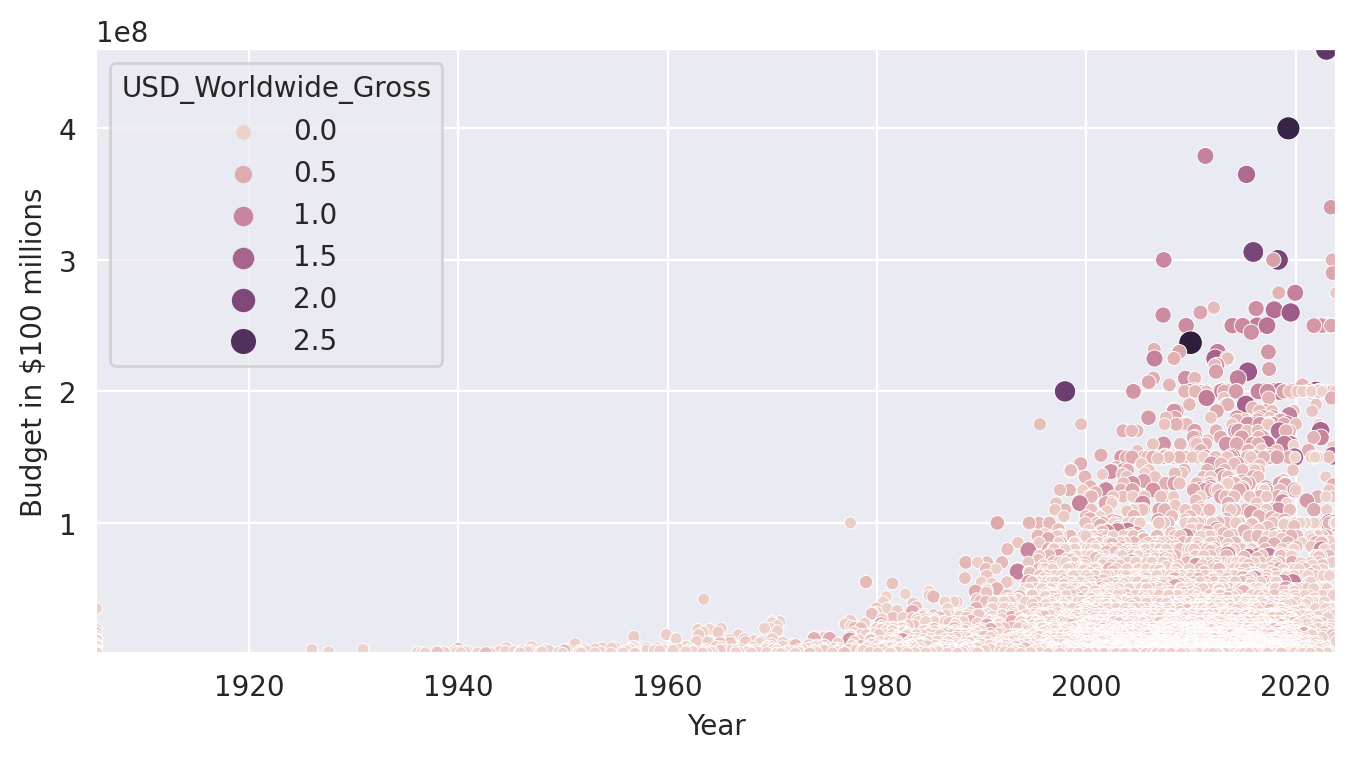

In [30]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data = df_clean,
                        x= 'Release_Date', y ='USD_Production_Budget', 
                         hue = 'USD_Worldwide_Gross', size = 'USD_Worldwide_Gross')
    ax.set(xlabel = 'Year', ylabel='Budget in $100 millions',
          xlim = (df_clean.Release_Date.min(), df_clean.Release_Date.max()),
          ylim = (df_clean.USD_Production_Budget.min(), df_clean.USD_Production_Budget.max()))

### Analysis

It is clear that the movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. During that period, the number of big-budget movies were considerably limited. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

### Regression Plot to discover the relationship between budget and revenue

Now, let's visualise the relationship between the movie budget and the worldwide revenue using linear regression.

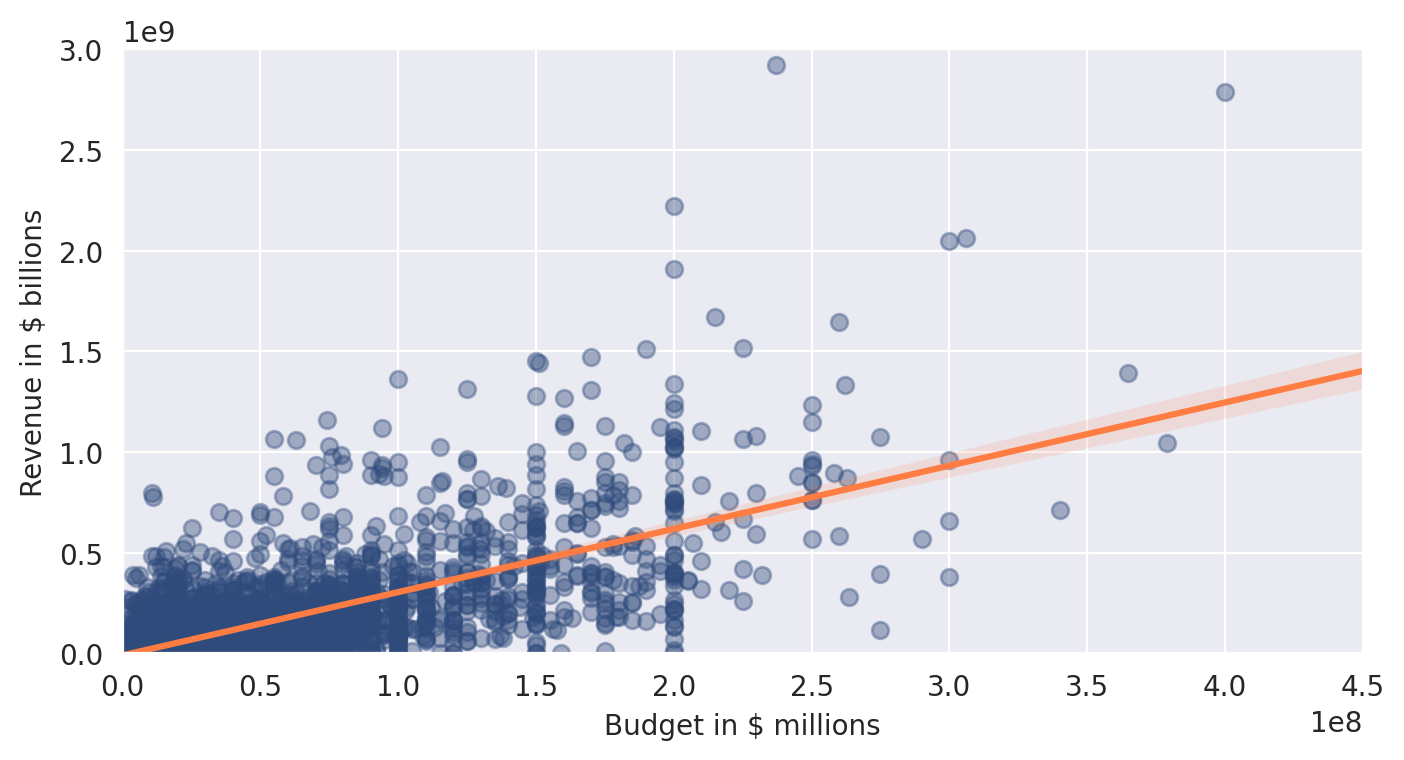

In [42]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(data = df_clean, 
                        x = 'USD_Production_Budget',
                        y= 'USD_Worldwide_Gross',
                        scatter_kws = {'alpha': 0.4, 'color': '#2f4b7c'},
                        line_kws = {'color': '#ff7c43'})
    ax.set(xlabel = 'Budget in $ millions',
          ylabel = 'Revenue in $ billions',
          xlim = (0, 450000000),
          ylim = (0, 3000000000))

### Analysis

We can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue. In particular, as the budget of a movie increases, there seems to be a positive movement in the amount of revenue generated by that movie.

However, to gain more insight into how much of the variation in revenue the budget actually does explain and how much extra revenue we can expect for an additional $1 increase in the budget, we need to dive into the numbers underlying the regression model as below.

# Data Prediction

### Build the linear regression model:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET $$ 

To find the best possible line, the regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

In [34]:
# Let's use scikit-learn to a create LinearRegression object
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [35]:
# Explanatory variable or Feature
X = pd.DataFrame(df_clean, columns=['USD_Production_Budget'])

# Response variable or Target
y = pd.DataFrame(df_clean, columns=['USD_Worldwide_Gross'])

In [36]:
# Find the best-fit line
regression.fit(X,y)

LinearRegression()

In [37]:
# Theta-one or Slope
regression.coef_[0,0]

3.1390013775721743

In [38]:
# Theta-zero or Intercept
regression.intercept_[0]

-9241838.781964421

In [39]:
# R-squared: Goodness of Fit
regression.score(X,y)

0.5324438077926186

### Analysis

The slope tells us that for every extra 1 USD in the budget, movie revenue increases by 3.14 USD. That means the higher our budget, the higher our estimated revenue. That is likely to help explain why we have seen a massive increase in budgets over the past 30 to 40 years.

As R-squared measures how well the model fits the data, a resulting r-squared of 0.532 means that our model explains about 53.2% of the variance in movie revenue. That is actually pretty amazing, considering we have got the simple model with only one explanatory variable.

### Use the model the make predictions for future revenue of unreleased films

Now, we go back to the 7 movies in `unreleased_films` and use the model that has just been built above to estimate the global revenue for each of them based on the stated production budget.

In [41]:
revenue_estimate = []

for budget in unreleased_films.USD_Production_Budget:
    revenue = regression.intercept_[0] + budget*regression.coef_[0,0]
    revenue_estimate.append(revenue)
    
unreleased_films['estimated_revenue'] = revenue_estimate

In [44]:
unreleased_films[['Release_Date', 'Movie_Title', 'USD_Production_Budget', 'estimated_revenue']]

,Release_Date,Movie_Title,USD_Production_Budget,estimated_revenue
53,2023-12-20,Aquaman and the Lost Kingdom,"205,000,000.00","634,253,443.62"
99,2023-11-22,Wish,"200,000,000.00","618,558,436.73"
348,2023-12-06,Wonka,"125,000,000.00","383,133,333.41"
1742,2025-05-02,Heaven and Hell,"40,000,000.00","116,318,216.32"
2591,2027-01-22,Mandate,"25,000,000.00","69,233,195.66"
4679,2025-06-27,Doktor Dinozavrov (Доктор Динозавров)…,"5,900,000.00","9,278,269.35"
4912,2023-12-25,Occupied City,"5,000,000.00","6,453,168.11"
